In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Import and assess data set

In [2]:
AccidentData3 = pd.read_csv('E:\Training Development\Coursera\IBM Data Science\Course 9 - Capstone Project\Capstone Project Data\AccidentData_2.csv')

In [3]:
len(AccidentData3.index)

189337

In [4]:
len(AccidentData3.columns)

9

# Perform basic statistics

In [5]:
AccidentData3.describe()

,OBJECTID,SEVERITYCODE,Day of week,Month of Year
count,189337.000000,189337.000000,189337.000000,189337.000000
mean,106689.517073,1.301325,2.943434,6.567311
std,62195.547505,0.458835,1.922760,3.424086
min,1.000000,1.000000,0.000000,1.000000
25%,53039.000000,1.000000,1.000000,4.000000
50%,104055.000000,1.000000,3.000000,7.000000
75%,159857.000000,2.000000,5.000000,10.000000
max,219547.000000,2.000000,6.000000,12.000000


In [41]:
AccidentData3['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

# Relationship between severity and weather

In [6]:
# Create a contingency table for SEVERITYCODE and WEATHER
Severity_Weather = pd.crosstab(AccidentData3['SEVERITYCODE'], 
                            AccidentData3['WEATHER'],  
                               margins = False) 
print(Severity_Weather) 

WEATHER       Blowing Sand/Dirt  Clear  Fog/Smog/Smoke  Other  Overcast  \
SEVERITYCODE                                                              
1                            40  75200             382    708     18942   
2                            15  35808             187    116      8739   

WEATHER       Partly Cloudy  Raining  Severe Crosswind  \
SEVERITYCODE                                             
1                         2    21949                18   
2                         3    11168                 7   

WEATHER       Sleet/Hail/Freezing Rain  Snowing  Unknown  
SEVERITYCODE                                              
1                                   85      732    14227  
2                                   28      169      812  


In [7]:
Severity_Weather[['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown']] = Severity_Weather[['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown']].apply(lambda x: x/x.sum(), axis=1)*100

In [8]:
Severity_Weather.head()

WEATHER,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
SEVERITYCODE,,,,,,,,,,,
1,0.030238,56.846959,0.288770,0.535208,14.319084,0.001512,16.592206,0.013607,0.064255,0.553351,10.754810
2,0.026292,62.763794,0.327771,0.203323,15.317605,0.005258,19.575124,0.012270,0.049078,0.296221,1.423263


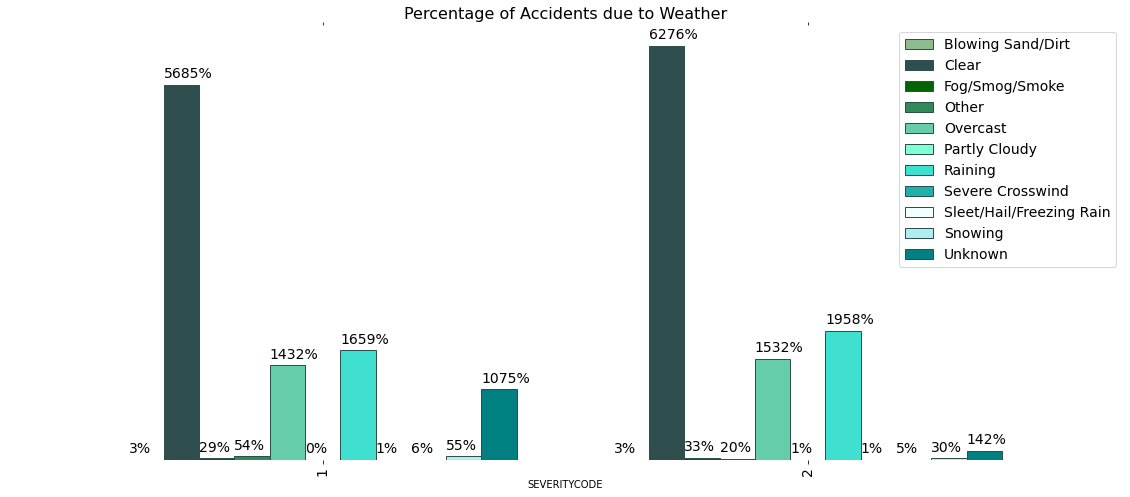

In [9]:
ax = Severity_Weather.plot(kind='bar',
                              figsize=(20, 8),
                              color=['darkseagreen', 'darkslategrey', 'darkgreen', 'seagreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'azure', 'paleturquoise', 'teal' ],
                              width = 0.8,
                              edgecolor='darkslategrey'
                              )

ax.set_title('Percentage of Accidents due to Weather', fontsize=16)
#ax.set_ylabel('Accident Frequency', fontsize=14)
#ax.set_xlabel('Severiy Class', fontsize=14)
ax.legend(fontsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 1), fontsize=14)

ax.get_yaxis().set_ticks([])

ax.set_facecolor('white')

#ax.set_yticklabels([])
#ax.set_xticklabels([])

#ax.spines['left'].set_visible(False)
    
#ax.axis('off')
    
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

In both severity classes the percentage frequency follows the same pattern. Exception is weather condition 'Unknown' that is significantly higher in severity class 1 (only property damage). The following weather conditions are slightly higher in severity class 2 (injury):

  Clear (5.91%)
  Overcast (1%)
  Raining (2.99%

# Relationship between severity and road condition

In [13]:
Severity_RoadCond = pd.crosstab(AccidentData3['SEVERITYCODE'], 
                            AccidentData3['ROADCOND'],  
                               margins = False) 
print(Severity_RoadCond) 

ROADCOND        Dry  Ice  Oil  Other  Sand/Mud/Dirt  Snow/Slush  \
SEVERITYCODE                                                      
1             84296  933   40     88             51         833   
2             40004  273   24     43             23         166   

ROADCOND      Standing Water  Unknown    Wet  
SEVERITYCODE                                  
1                         85    14284  31675  
2                         30      747  15742  


In [14]:
Severity_RoadCond[['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet']] = Severity_RoadCond[['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet']].apply(lambda x: x/x.sum(), axis=1)*100

In [15]:
Severity_RoadCond.head()

ROADCOND,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
SEVERITYCODE,,,,,,,,,
1,63.723022,0.705295,0.030238,0.066523,0.038553,0.629701,0.064255,10.797898,23.944514
2,70.118488,0.478511,0.042067,0.075370,0.040314,0.290963,0.052584,1.309332,27.592372


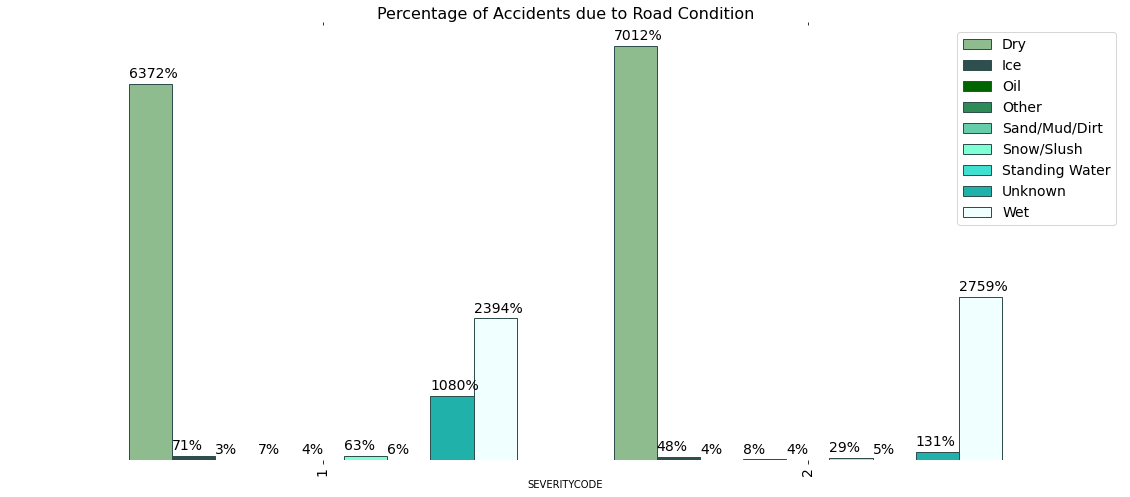

In [16]:
ax = Severity_RoadCond.plot(kind='bar',
                              figsize=(20, 8),
                              color=['darkseagreen', 'darkslategrey', 'darkgreen', 'seagreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'azure', 'paleturquoise', 'teal' ],
                              width = 0.8,
                              edgecolor='darkslategrey'
                              )

ax.set_title('Percentage of Accidents due to Road Condition', fontsize=16)
#ax.set_ylabel('Accident Frequency', fontsize=14)
#ax.set_xlabel('Severiy Class', fontsize=14)
ax.legend(fontsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 1), fontsize=14)

ax.get_yaxis().set_ticks([])

ax.set_facecolor('white')

#ax.set_yticklabels([])
#ax.set_xticklabels([])

#ax.spines['left'].set_visible(False)
    
#ax.axis('off')
    
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

In both severity classes the percentage frequency follows the same pattern. Exception is road condition 'Unknown' that is significantly higher in severity class 1 (only property damage). The following road conditions are slightly higher in severity class 2 (injury):
  Dry (6.4%)
  Wet (3.65%)

# Relationship between severity and light condition

In [17]:
# Create a contingency table for SEVERITYCODE and LIGHTCOND
Severity_LightCond = pd.crosstab(AccidentData3['SEVERITYCODE'], 
                            AccidentData3['LIGHTCOND'],  
                               margins = False) 
print(Severity_LightCond) 

LIGHTCOND     Dark - No Street Lights  Dark - Street Lights Off  \
SEVERITYCODE                                                      
1                                1201                       876   
2                                 334                       316   

LIGHTCOND     Dark - Street Lights On  Dark - Unknown Lighting  Dawn  \
SEVERITYCODE                                                           
1                               33989                        7  1678   
2                               14451                        4   824   

LIGHTCOND     Daylight  Dusk  Other  Unknown  
SEVERITYCODE                                  
1                77549  3951    183    12851  
2                38528  1938     52      605  


In [18]:
Severity_LightCond[['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown']] = Severity_LightCond[['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown']].apply(lambda x: x/x.sum(), axis=1)*100

In [19]:
Severity_LightCond.head()

LIGHTCOND,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
SEVERITYCODE,,,,,,,,,
1,0.907888,0.662207,25.693767,0.005292,1.268473,58.622671,2.986733,0.138338,9.714631
2,0.585431,0.553881,25.329524,0.007011,1.444296,67.531375,3.396901,0.091145,1.060436


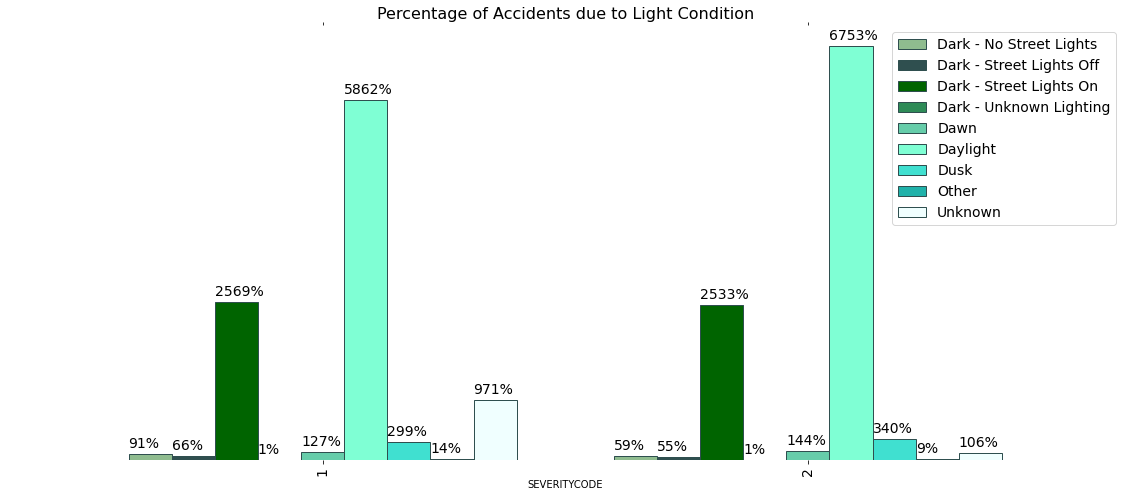

In [37]:
ax = Severity_LightCond.plot(kind='bar',
                              figsize=(20, 8),
                              color=['darkseagreen', 'darkslategrey', 'darkgreen', 'seagreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'azure', 'paleturquoise', 'teal' ],
                              width = 0.8,
                              edgecolor='darkslategrey'
                              )

ax.set_title('Percentage of Accidents due to Light Condition', fontsize=16)
#ax.set_ylabel('Accident Frequency', fontsize=14)
#ax.set_xlabel('Severiy Class', fontsize=14)
ax.legend(fontsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 1), fontsize=14)

ax.get_yaxis().set_ticks([])

ax.set_facecolor('white')

#ax.set_yticklabels([])
#ax.set_xticklabels([])

#ax.spines['left'].set_visible(False)
    
#ax.axis('off')
    
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

In both severity classes the percentage frequency follows the same pattern. Exception is light condition 'Unknown' that is significantly higher in severity class 1 (only property damage). The following road conditions are slightly higher in severity class 2 (injury):
  Daylight (8.91%)

# Relationship between severity and day of week

In [21]:
# Create a contingency table for SEVERITYCODE and DAY OF WEEK
Severity_DayofWeek = pd.crosstab(AccidentData3['SEVERITYCODE'], 
                            AccidentData3['Day of week'],  
                               margins = False) 
print(Severity_DayofWeek) 

Day of week       0      1      2      3      4      5      6
SEVERITYCODE                                                 
1             17749  19173  19343  19640  22030  18858  15492
2              7807   8556   8585   8855   9364   7897   5988


In [22]:
Severity_DayofWeek.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saterday', 'Sunday']
print(Severity_DayofWeek)

Monday  Tuesday  Wednesday  Thursday  Friday  Saterday  Sunday
SEVERITYCODE                                                                
1              17749    19173      19343     19640   22030     18858   15492
2               7807     8556       8585      8855    9364      7897    5988


In [23]:
Severity_DayofWeek[['Monday','Tuesday','Wednesday','Thursday','Friday','Saterday','Sunday']] = Severity_DayofWeek[['Monday','Tuesday','Wednesday','Thursday','Friday','Saterday','Sunday']].apply(lambda x: x/x.sum(), axis=1)*100

In [25]:
Severity_DayofWeek.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saterday,Sunday
SEVERITYCODE,,,,,,,
1,13.417243,14.493707,14.622217,14.846732,16.653438,14.255585,11.711078
2,13.684008,14.996845,15.047676,15.520928,16.413097,13.841758,10.495688


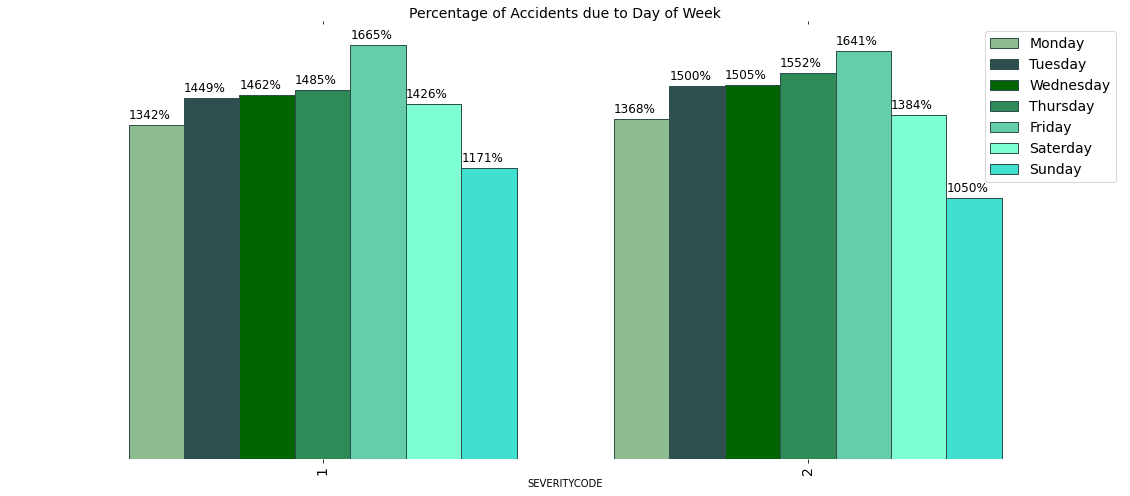

In [26]:
ax = Severity_DayofWeek.plot(kind='bar',
                              figsize=(20, 8),
                              color=['darkseagreen', 'darkslategrey', 'darkgreen', 'seagreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'azure', 'paleturquoise', 'teal' ],
                              width = 0.8,
                              edgecolor='darkslategrey'
                              )

ax.set_title('Percentage of Accidents due to Day of Week', fontsize=14)
#ax.set_ylabel('Accident Frequency', fontsize=14)
#ax.set_xlabel('Severiy Class', fontsize=14)
ax.legend(fontsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.25), fontsize=12)

ax.get_yaxis().set_ticks([])

ax.set_facecolor('white')

#ax.set_yticklabels([])
#ax.set_xticklabels([])

#ax.spines['left'].set_visible(False)
    
#ax.axis('off')
    
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

In both severity classes the percentage accident frequency follows the same pattern i.e. most accidents occur on a Friday. There are no significant difference between the severity of the accident and day of week.

# Relationship between severity and month of year

In [27]:
Severity_MonthofYear = pd.crosstab(AccidentData3['SEVERITYCODE'], 
                            AccidentData3['Month of Year'],  
                               margins = False) 
print(Severity_MonthofYear) 

Month of Year     1     2      3      4      5      6      7      8      9   \
SEVERITYCODE                                                                  
1              11284  9664  11105  10898  11147  11382  10916  10918  10796   
2               4591  3877   4661   4677   5063   4868   5071   5006   4758   

Month of Year     10     11     12  
SEVERITYCODE                        
1              11882  11410  10883  
2               5410   4823   4247  


In [28]:
Severity_MonthofYear.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
print(Severity_MonthofYear)

January  February  March  April    May   June   July  August  \
SEVERITYCODE                                                                 
1               11284      9664  11105  10898  11147  11382  10916   10918   
2                4591      3877   4661   4677   5063   4868   5071    5006   

              September  October  November  December  
SEVERITYCODE                                          
1                 10796    11882     11410     10883  
2                  4758     5410      4823      4247  


In [29]:
Severity_MonthofYear[['January','February','March','April','May','June','July','August','September','October','November','December']] = Severity_MonthofYear[['January','February','March','April','May','June','July','August','September','October','November','December']].apply(lambda x: x/x.sum(), axis=1)*100

In [30]:
Severity_MonthofYear.head()

,January,February,March,April,May,June,July,August,September,October,November,December
SEVERITYCODE,,,,,,,,,,,,
1,8.530068,7.305439,8.394754,8.238273,8.426503,8.604150,8.251880,8.253392,8.161167,8.982122,8.625317,8.226934
2,8.047045,6.795555,8.169740,8.197784,8.874360,8.532567,8.888383,8.774451,8.339760,9.482577,8.453691,7.444086


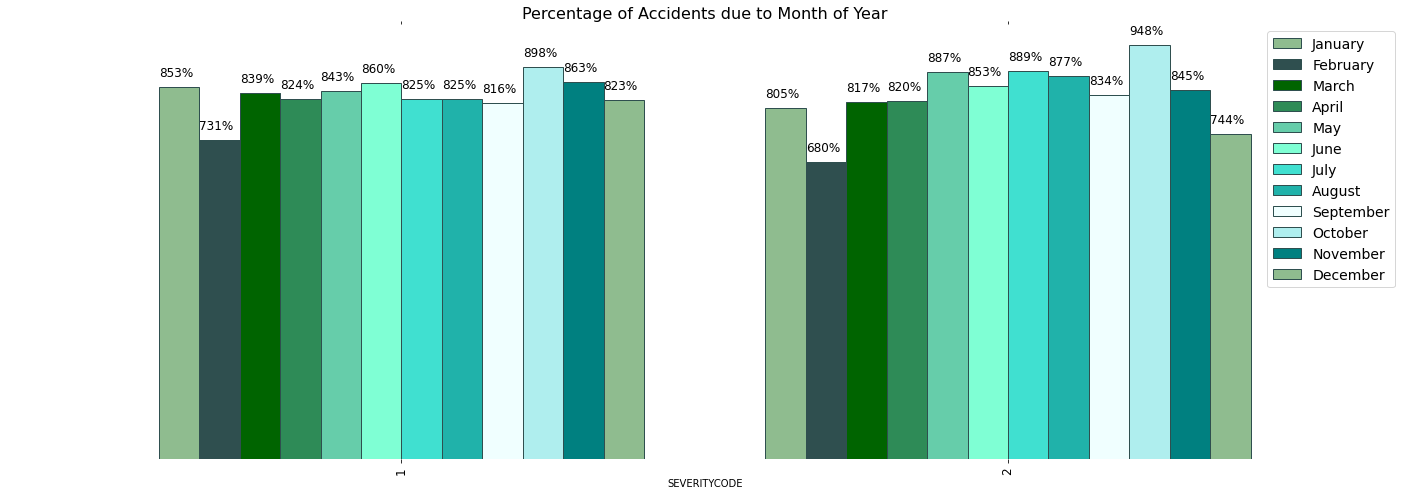

In [31]:
ax = Severity_MonthofYear.plot(kind='bar',
                              figsize=(25, 8),
                              color=['darkseagreen', 'darkslategrey', 'darkgreen', 'seagreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'azure', 'paleturquoise', 'teal' ],
                              width = 0.8,
                              edgecolor='darkslategrey'
                              )

ax.set_title('Percentage of Accidents due to Month of Year', fontsize=16)
#ax.set_ylabel('Accident Frequency', fontsize=14)
#ax.set_xlabel('Severiy Class', fontsize=14)
ax.legend(fontsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.25), fontsize=12)

ax.get_yaxis().set_ticks([])

ax.set_facecolor('white')

#ax.set_yticklabels([])
#ax.set_xticklabels([])

#ax.spines['left'].set_visible(False)
    
#ax.axis('off')
    
plt.xticks(fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top='on', bottom='on', left='on', right='on', labelleft='on', labelbottom='on')

In both severity classes the percentage frequency follows the same pattern. There are no significant difference between the severity of the accident and month of the year.

# Relationship between severity and junction type

In [32]:
# Create a contingency table for SEVERITYCODE and JUNCTIONTYPE
Severity_JuntionType= pd.crosstab(AccidentData3['SEVERITYCODE'], 
                            AccidentData3['JUNCTIONTYPE'],  
                               margins = False) 

In [33]:
print(Severity_JuntionType)


JUNCTIONTYPE  At Intersection (but not related to intersection)  \
SEVERITYCODE                                                      
1                                                          1441   
2                                                           616   

JUNCTIONTYPE  At Intersection (intersection related)  Driveway Junction  \
SEVERITYCODE                                                              
1                                              34506               7324   
2                                              26735               3196   

JUNCTIONTYPE  Mid-Block (but intersection related)  \
SEVERITYCODE                                         
1                                            15164   
2                                             7189   

JUNCTIONTYPE  Mid-Block (not related to intersection)  Ramp Junction  Unknown  
SEVERITYCODE                                                                   
1                                               67976

In [34]:
Severity_JuntionType[['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown']] = Severity_JuntionType[['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown']].apply(lambda x: x/x.sum(), axis=1)*100

In [35]:
Severity_JuntionType.head()

JUNCTIONTYPE,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown
SEVERITYCODE,,,,,,,
1,1.089315,26.084590,5.536531,11.463129,51.386023,0.083154,4.357259
2,1.079717,46.860759,5.601907,12.600785,33.092617,0.091145,0.673070


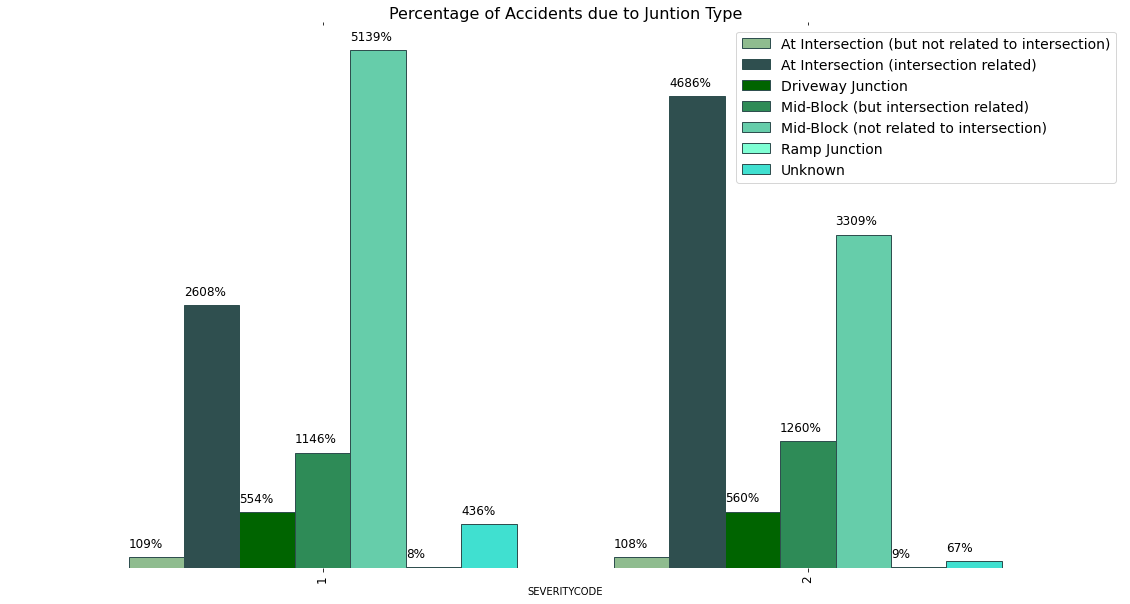

In [40]:
ax = Severity_JuntionType.plot(kind='bar',
                              figsize=(20, 10),
                              color=['darkseagreen', 'darkslategrey', 'darkgreen', 'seagreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'azure', 'paleturquoise', 'teal' ],
                              width = 0.8,
                              edgecolor='darkslategrey'
                              )

ax.set_title('Percentage of Accidents due to Juntion Type', fontsize=16)
#ax.set_ylabel('Accident Frequency', fontsize=14)
#ax.set_xlabel('Severiy Class', fontsize=14)
ax.legend(fontsize=14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 1), fontsize=12)

ax.get_yaxis().set_ticks([])

ax.set_facecolor('white')

#ax.set_yticklabels([])
#ax.set_xticklabels([])

#ax.spines['left'].set_visible(False)
    
#ax.axis('off')
    
plt.xticks(fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

#get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tick_params(top='on', bottom='on', left='on', right='on', labelleft='on', labelbottom='on')

The chance of injury (severitycode 2) is significantly higher at an intersection
The chance of injury (severitycode 2) is significantly lower at a ramp junction